In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
# this written to run cv2
import sys
sys.path.append('E:\\myenv\\Lib\\site-packages')

In [3]:
X_train = np.loadtxt('E:\\features & labels CNN\\CNN_1000_features.csv', delimiter = ',')
Y_train = np.loadtxt('E:\\features & labels CNN\\CNN_1000_lables.csv', delimiter = ',')
X_test = np.loadtxt('E:\\features & labels CNN\\CNN_300_features.csv', delimiter = ',')
Y_test = np.loadtxt('E:\\features & labels CNN\\CNN_300_lables.csv', delimiter = ',')

In [4]:
import cv2
import numpy as np

X_train = np.loadtxt('E:\\features & labels CNN\\CNN_1000_features.csv', delimiter = ',')
Y_train = np.loadtxt('E:\\features & labels CNN\\CNN_1000_lables.csv', delimiter = ',')
X_test = np.loadtxt('E:\\features & labels CNN\\CNN_300_features.csv', delimiter = ',')
Y_test = np.loadtxt('E:\\features & labels CNN\\CNN_300_lables.csv', delimiter = ',')
# Resize the images to the desired size
X_train_resized = []
for img in X_train:
    img_resized = cv2.resize(img, (100, 100))
    X_train_resized.append(img_resized)
X_train_resized = np.array(X_train_resized)

X_test_resized = []
for img in X_test:
    img_resized = cv2.resize(img, (100, 100))
    X_test_resized.append(img_resized)
X_test_resized = np.array(X_test_resized)

# Stack the grayscale images to create 3-channel images
X_train = np.stack([X_train_resized]*3, axis=-1)
X_test = np.stack([X_test_resized]*3, axis=-1)

# Reshape the input data to match the required input shape for the model
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print(X_train.shape)

(1000, 100, 100, 3)


In [6]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (1000, 100, 100, 3)
Shape of Y_train:  (1000, 1)
Shape of X_test:  (300, 100, 100, 3)
Shape of Y_test:  (300, 1)


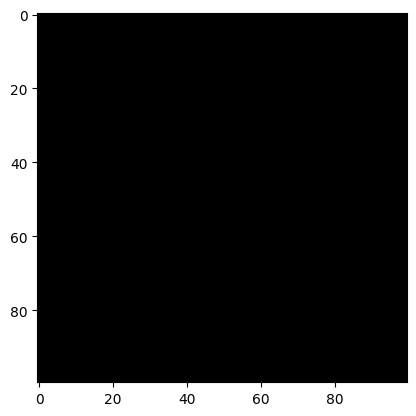

In [8]:
import random
import matplotlib.pyplot as plt

# Assuming X_train is the dataset containing images

# Choose a random index from the training set
idx = random.randint(0, len(X_train))

# Normalize the image data to the [0, 1] range
normalized_image = X_train[idx] / 255.0  # Assuming pixel values are in [0, 255] range

# Clip the values to the valid range [0, 1]
normalized_image = np.clip(normalized_image, 0.0, 1.0)

# Display the normalized image
plt.imshow(normalized_image)
plt.show()


# Model kNN

In [21]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Flatten Y_train to ensure it's a 1D array
Y_train_flat = Y_train.ravel()

# Parameters
num_epochs = 5
batch_size = 64
total_samples = X_train_flat.shape[0]
num_batches = total_samples // batch_size

# Create the K-NN classifier
knn_classifier = KNeighborsClassifier()

for epoch in range(num_epochs):
    # Shuffle the training data for each epoch
    shuffled_indices = np.random.permutation(total_samples)
    X_train_flat_shuffled = X_train_flat[shuffled_indices]
    Y_train_flat_shuffled = Y_train_flat[shuffled_indices]
    
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = start_index + batch_size
        
        # Get the current batch
        X_batch = X_train_flat_shuffled[start_index:end_index]
        Y_batch = Y_train_flat_shuffled[start_index:end_index]
        
        # Train the K-NN on the current batch
        knn_classifier.fit(X_batch, Y_batch)
    
    # Evaluate the model after each epoch
    Y_pred = knn_classifier.predict(X_test_flat)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Accuracy after Epoch {epoch + 1}: {accuracy:.4f}\n")

Epoch 1/5
Accuracy after Epoch 1: 0.7333

Epoch 2/5
Accuracy after Epoch 2: 0.7733

Epoch 3/5
Accuracy after Epoch 3: 0.6633

Epoch 4/5
Accuracy after Epoch 4: 0.7900

Epoch 5/5
Accuracy after Epoch 5: 0.7933



In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Flatten Y_train to ensure it's a 1D array
Y_train_flat = Y_train.ravel()

# Parameters
num_epochs = 5
batch_size = 64
total_samples = X_train_flat.shape[0]
num_batches = total_samples // batch_size

# Create the K-NN classifier
knn_classifier = KNeighborsClassifier()

for epoch in range(num_epochs):
    # Shuffle the training data for each epoch
    shuffled_indices = np.random.permutation(total_samples)
    X_train_flat_shuffled = X_train_flat[shuffled_indices]
    Y_train_flat_shuffled = Y_train_flat[shuffled_indices]
    
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = start_index + batch_size
        
        # Get the current batch
        X_batch = X_train_flat_shuffled[start_index:end_index]
        Y_batch = Y_train_flat_shuffled[start_index:end_index]
        
        # Train the K-NN on the current batch
        knn_classifier.fit(X_batch, Y_batch)
    
    # Evaluate the model after each epoch
    Y_pred = knn_classifier.predict(X_test_flat)
    report = classification_report(Y_test, Y_pred, target_names=['Class 0', 'Class 1'])
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print("Classification Report:")
    print(report)

Epoch 1/5
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.71      0.91      0.80       150
     Class 1       0.87      0.63      0.73       150

    accuracy                           0.77       300
   macro avg       0.79      0.77      0.76       300
weighted avg       0.79      0.77      0.76       300

Epoch 2/5
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.68      0.73       150
     Class 1       0.72      0.83      0.77       150

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300

Epoch 3/5
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.67      0.87      0.75       150
     Class 1       0.81      0.57      0.67       150

    accuracy                           0.72       300
   macro avg       0.74      

# Making predictions


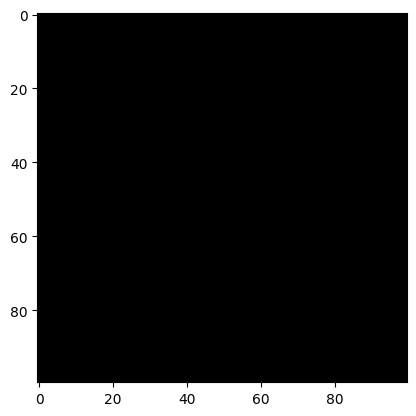

Our model says that it is a: tumor


In [26]:
import random
import matplotlib.pyplot as plt

# Assuming knn_classifier is the trained K-NN classifier

# Choose a random index from the test set
idx2 = random.randint(0, len(Y_test))

# Normalize the image data to the [0, 1] range
normalized_image = X_test[idx2, :] / 255.0  # Assuming pixel values are in [0, 255] range

# Clip the values to the valid range [0, 1]
normalized_image = np.clip(normalized_image, 0.0, 1.0)

# Display the normalized image
plt.imshow(normalized_image.reshape(100, 100, 3))
plt.show()

# Predict using the K-NN model
y_pred = knn_classifier.predict(normalized_image.reshape(1, -1))

if y_pred == 0:
    pred = 'no tumor'
else:
    pred = 'tumor'

print("Our model says that it is a:", pred)